In [2]:
#importing all the necessary libraries while installing Facebook Prophet
#NOTE: an older verion of pystan was installed in order for fbprophet to work

!pip install pystan~=2.14
!pip install fbprophet


import numpy as np
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot as plt
from numpy.lib.function_base import append



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 82 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6750858 sha256=9cfef5267f765022f5ccf1b2b8e1f96161c87d610c262fc2145c74876edf702e
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the p

In [3]:
#Calling the data file from the drive
drive.mount('/content/drive')
combine_cancel = pd.read_csv('/content/drive/Shareddrives/IND708/final_forecasting.csv')

Mounted at /content/drive


In [4]:
#Displaying the data table for reference
combine_cancel.head()

,Unnamed: 0,FlightDate,Month,Cancelled,Unnamed: 0.1,Unnamed: 0.1.1
0,23,2018-01-17,1,True,NaN,NaN
1,49,2018-01-12,1,True,NaN,NaN
2,54,2018-01-17,1,True,NaN,NaN
3,101,2018-01-04,1,True,NaN,NaN
4,128,2018-01-04,1,True,NaN,NaN


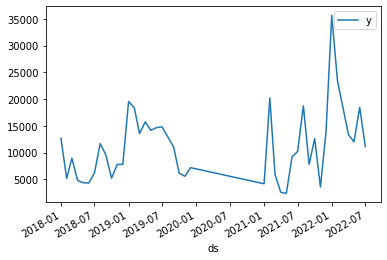

In [5]:

#seperated the flightdate values in order to place it in the new data frame as a DateTime type
combine_cancel['Year'] = combine_cancel['FlightDate'].apply(lambda x: str(x)[:-6])
combine_cancel['Month'] = combine_cancel['FlightDate'].apply(lambda x: str(x)[-5:-3])
combine_cancel['ds'] =pd.DatetimeIndex(combine_cancel['Year']+'-'+combine_cancel['Month'])

#ds_1 is an empty list to place each unique value for the flight date(only year and month)
#count is an empty list to count the number of times a flightdate value is repeated
ds_1=[]
count=[]
h=1
n=combine_cancel['ds']

#Organized the table to display the count for every month of every year in the data 
for i in range(0, len(n)-1):
    if n[i ] != n[i+1]:
      ds_1.append(n[i])
      count.append(h)
      h=1
    else:
      h=h+1
      
#Created the final data frame to start forecasting
data= {'ds':ds_1,'y':count}
df = pd.DataFrame(data)

#Cleaned up the data frame
df.sort_values(by='ds', inplace=True)
df = df.reset_index(drop=True)

#Displayed dataframe table and graph for reference
df.head()
df.plot(x ='ds', y='y', kind='line')

In [6]:
model = Prophet(interval_width=0.95)
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
#Created forecast table
future_dates = model.make_future_dataframe(periods=12, freq='MS')
forecast =model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

##Compared the values of Jan 2022 to Jan 2023
print("The value for 2022/01 cancellation count is :")
print( forecast.loc[36,'trend'])
print('\nThe value for 2022/01 cancellation count is :' )
print(forecast.loc[47,'trend'])



The value for 2022/01 cancellation count is :
13571.613283723822

The value for 2022/01 cancellation count is :
14970.461794050556


Text(47.625, 0.5, 'Number of Cancelled Flights')

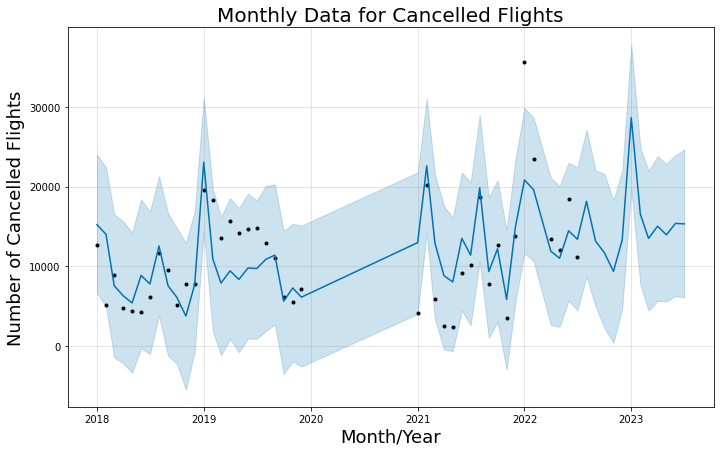

In [8]:
#Creating a graph to represent the data while also editing the titles
figure_1 = model.plot(forecast, uncertainty=True, xlabel='Date', ylabel='Value')
g = figure_1.gca()
g.set_title("Monthly Data for Cancelled Flights", size=20)
g.set_xlabel("Month/Year", size=18)
g.set_ylabel("Number of Cancelled Flights", size=18)